---
### Proyecto Retail 
### Fase 1. Limpieza de datos
### Por: Equipo 5 (Luis Hermenegildo)
---

---
#### Instalación de prerequisitos
---

In [1]:
#Instalar requerimientos
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

---
#### Carga de librerias
---

In [2]:
#Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import hasNullData

---
#### Lectura de archivo y carga exploración de datos
---

In [3]:
# Cargar los datos
df = pd.read_csv('../../data/OnlineRetail.csv', encoding='ISO-8859-1')
# Mostrar las primeras filas
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:

# Estadísticas descriptivas
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Verificar valores nulos
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


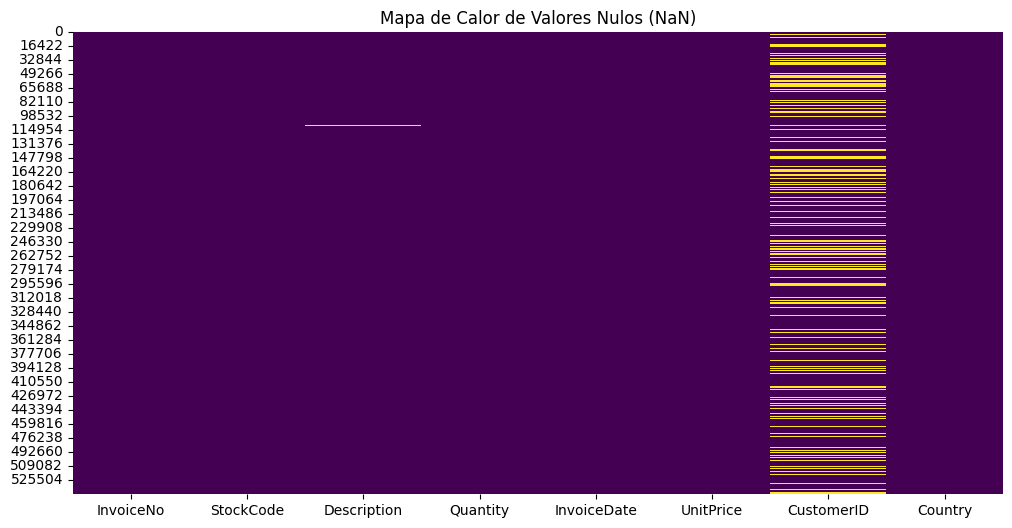

In [7]:
#Verificamos que el dataframe no tenga datos vacios
hasNullData(df)

---
#### Proceso de limpieza de datos
---

In [8]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Eliminar filas con valores nulos en CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Rellenar valores nulos en la columna Description con "Unknown"
df['Description'].fillna('Unknown', inplace=True)

# Eliminar filas con cantidad negativa o cero
df = df[df['Quantity'] > 0]

# Eliminar filas con precio negativo o cero
df = df[df['UnitPrice'] > 0]

# Convertir a minúsculas y eliminar espacios innecesarios en la columna Description
df['Description'] = df['Description'].str.lower().str.strip()

# Estandarizar nombres de países
df['Country'] = df['Country'].str.title()

# Verificar cambios
print(df.info())

C:\Users\luish\AppData\Local\Temp\ipykernel_21696\2845636746.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB
None


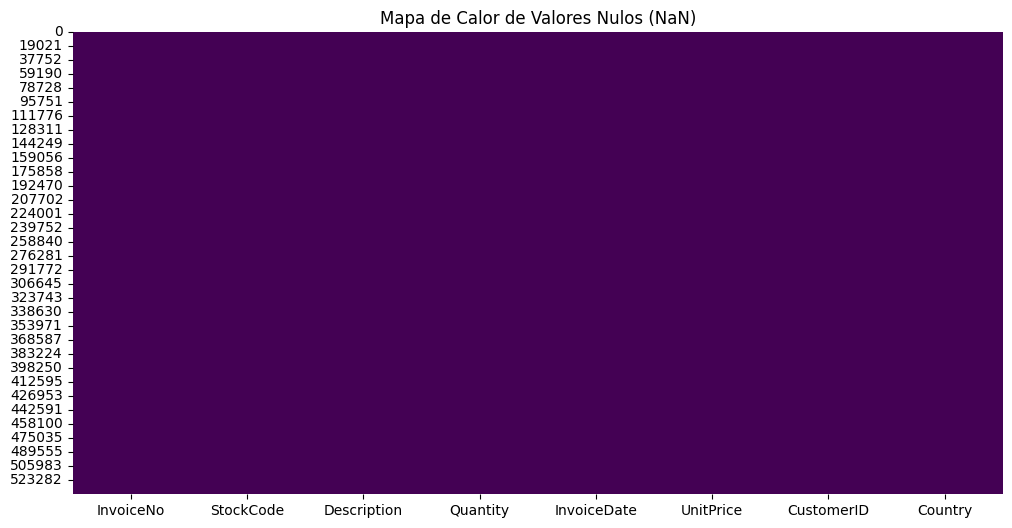

In [9]:
#Después de la limpieza verificamos que el dataframe no tenga datos vacios
hasNullData(df)

---
#### Guardar el dataset limpio
---

In [10]:

df.to_csv('../../data/OnlineRetail_clean.csv', index=False)

---
#### Fin del proceso
---

---
### Exploración de datos
---

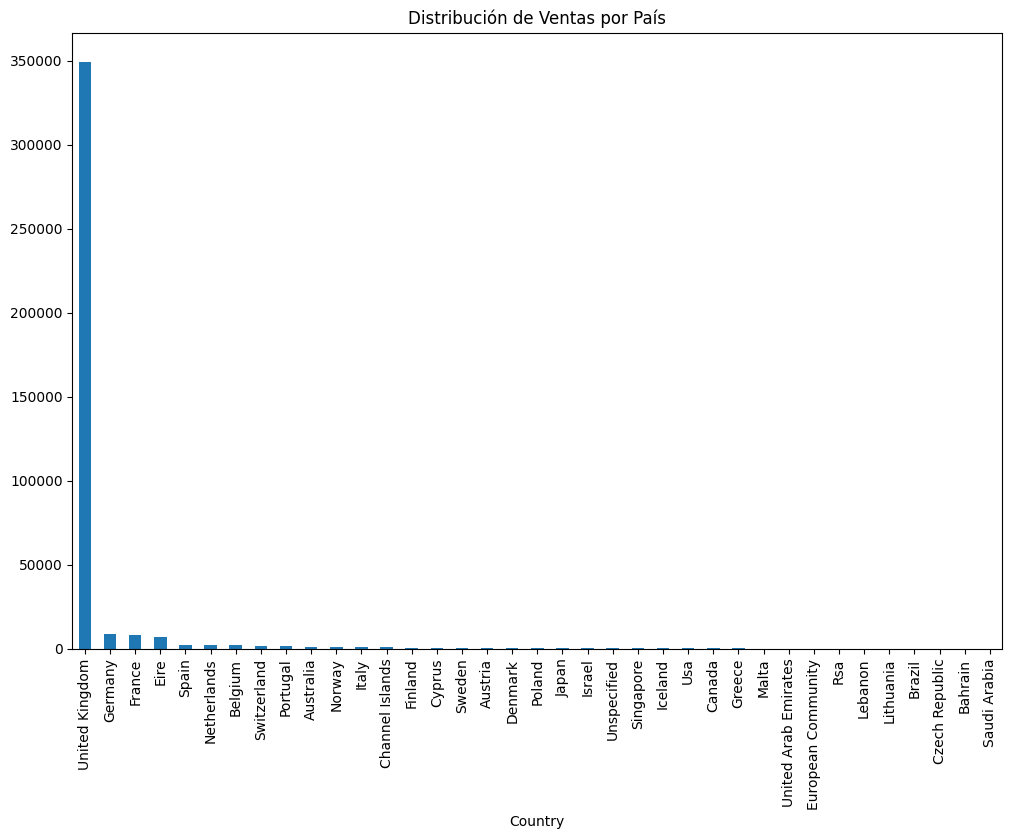

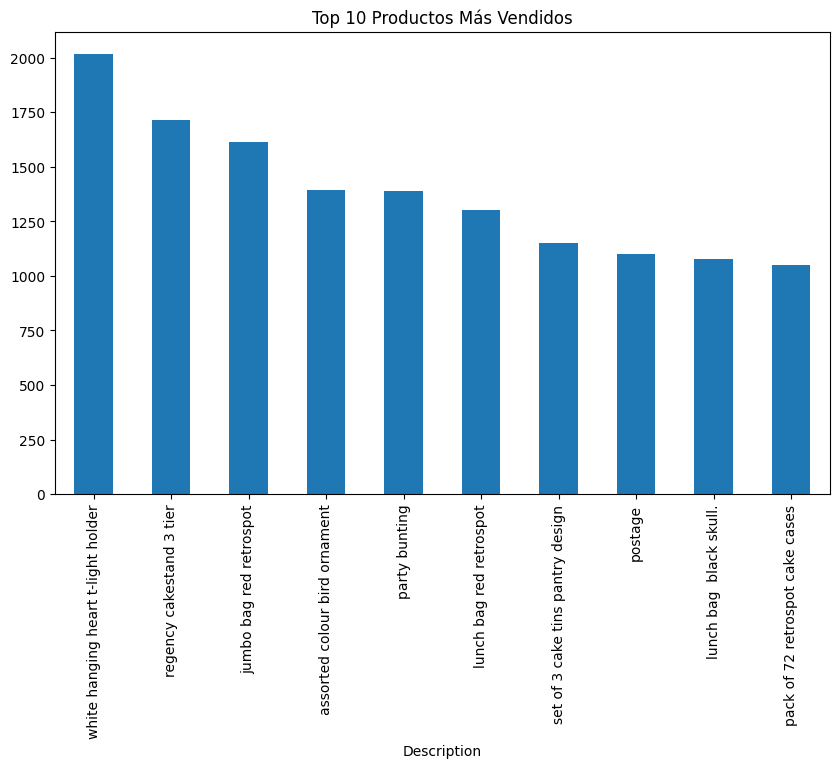

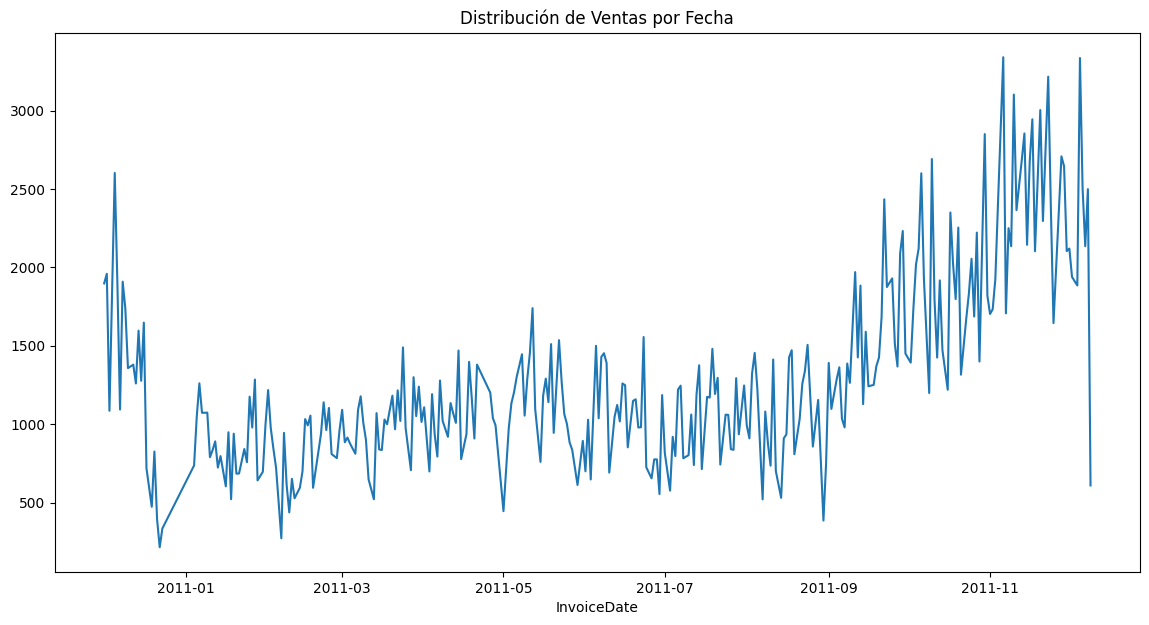

In [11]:
# Distribución de ventas por país
plt.figure(figsize=(12, 8))
df['Country'].value_counts().plot(kind='bar')
plt.title('Distribución de Ventas por País')
plt.show()

# Productos más vendidos
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Productos Más Vendidos')
plt.show()

# Distribución de ventas por fecha
df['InvoiceDate'].dt.date.value_counts().sort_index().plot(figsize=(14, 7))
plt.title('Distribución de Ventas por Fecha')
plt.show()
